# Get the optimal N cluster value of each estimator and it's index values

To explore new improvements, we begin with getting the number of clusters with all implemented indeices and the news clustering estimators to reach the desired result.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

from src.cluster import KMedoids, FCM
from src.ranking.vector_measures import (
    get_n_groups_elbow_technique,
    get_n_groups_information_criteria,
    get_n_groups_max_diff,
    get_n_groups_min_diff
)

We instantiate the `MinMaxScaler` and set a new range of $n$ clusters

In [4]:
m, n, step = 2, 16, 2
mms = MinMaxScaler()

In [5]:
iris, target = load_iris(return_X_y = True)
scaled_iris = mms.fit_transform(iris)

# K Means calculation

In [6]:
kmeans_ng, kmeans_index = get_n_groups_elbow_technique(scaled_iris, KMeans, m, n, step)
kmeans_ng_aic, kmeans_index_aic = get_n_groups_information_criteria(scaled_iris, 'aic', m, n, step)
print(kmeans_ng_aic)
kmeans_ng_bic, kmeans_index_bic = get_n_groups_information_criteria(scaled_iris, 'bic', m, n, step)
kmeans_ng_dunn, kmeans_index_dunn = get_n_groups_max_diff(scaled_iris, KMeans, 'dunn', m, n, step)
kmeans_ng_sil, kmeans_index_sil = get_n_groups_max_diff(scaled_iris, KMeans, 'sil', m, n, step)
kmeans_ng_davies, kmeans_index_davies = get_n_groups_min_diff(scaled_iris, KMeans, 'davies', m, n, step)
kmeans_ng_sddis, kmeans_index_sddis = get_n_groups_min_diff(scaled_iris, KMeans, 'sddis', m, n, step)

12


## AIC and BIC exception*

Since it's used the gaussian estimator to calculate they values, don't need repeat themselves

Text(12.25, -980.25, 'Number of clusters optimal is 12')

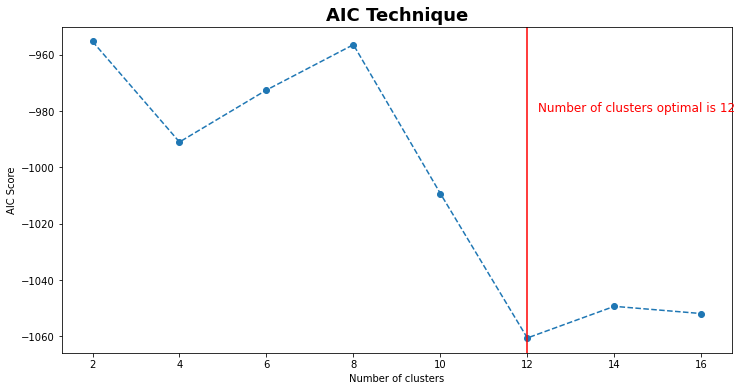

In [7]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),kmeans_index_aic,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('AIC Score')
plt.title('AIC Technique',fontweight='bold',fontsize=18)
plt.axvline(kmeans_ng_aic,color='r',linestyle='-')
plt.text(12.25,-980.250,"Number of clusters optimal is {}".format(kmeans_ng_aic),color = 'red',fontsize = 12)

Text(2.25, -500.25, 'Number of clusters optimal is 2')

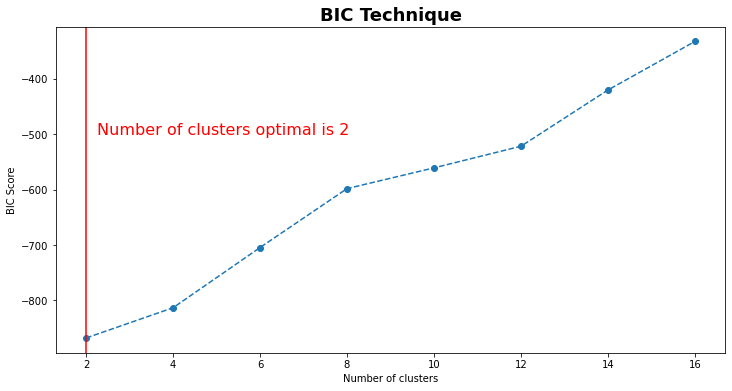

In [8]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),kmeans_index_bic,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('BIC Score')
plt.title('BIC Technique',fontweight='bold',fontsize=18)
plt.axvline(kmeans_ng_bic,color='r',linestyle='-')
plt.text(2.25,-500.250,"Number of clusters optimal is {}".format(kmeans_ng_bic),color = 'red',fontsize = 16)

## Plotting K Means result

Text(5.25, 8.25, 'Number of clusters optimal is 8')

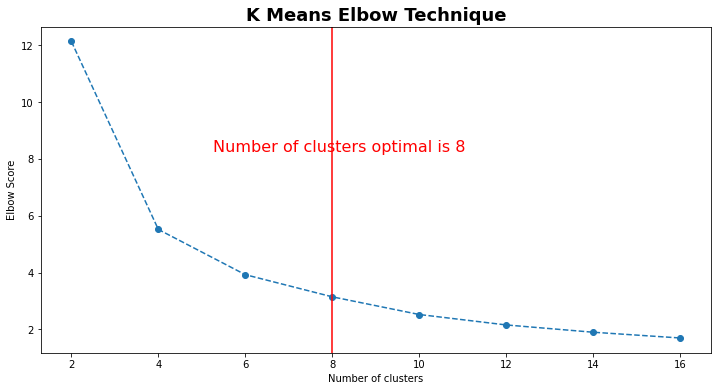

In [9]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),kmeans_index,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Elbow Score')
plt.title('K Means Elbow Technique',fontweight='bold',fontsize=18)
plt.axvline(kmeans_ng,color='r',linestyle='-')
plt.text(5.25,8.250,"Number of clusters optimal is {}".format(kmeans_ng),color = 'red',fontsize = 16)

Text(2.25, 0.3525, 'Number of clusters optimal is 2')

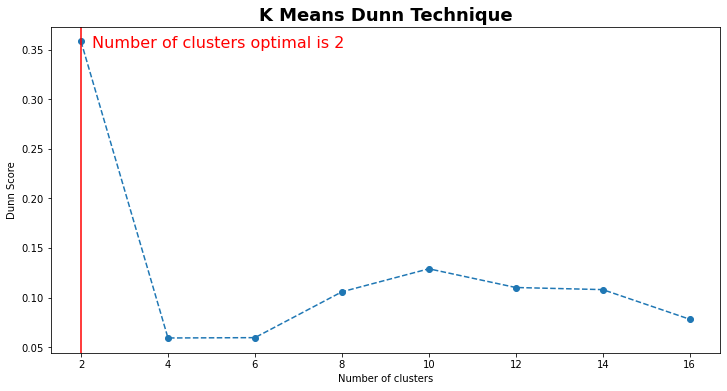

In [10]:
plt.figure(figsize=(12,6))
plt.plot(range(2, 17, 2),kmeans_index_dunn,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Dunn Score')
plt.title('K Means Dunn Technique',fontweight='bold',fontsize = 18)
plt.axvline(kmeans_ng_dunn, color = 'r', linestyle = '-')
plt.text(2.25,0.35250,"Number of clusters optimal is {}".format(kmeans_ng_dunn),color = 'red',fontsize = 16)

Text(2.25, 0.625, 'Number of clusters optimal is 2')

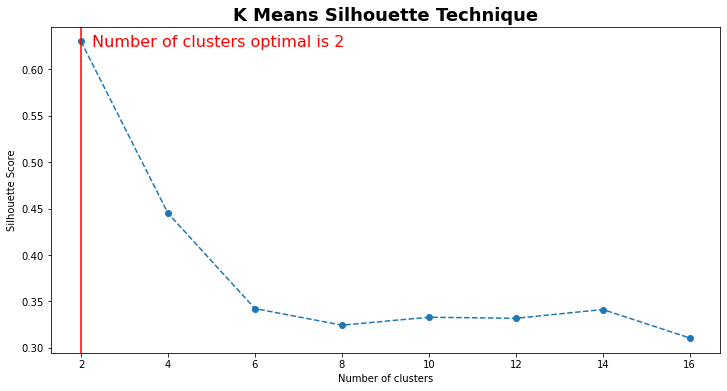

In [11]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),kmeans_index_sil,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('K Means Silhouette Technique',fontweight='bold',fontsize=18)
plt.axvline(kmeans_ng_sil,color='r',linestyle='-')
plt.text(2.25,0.6250,"Number of clusters optimal is {}".format(kmeans_ng_sil),color = 'red',fontsize = 16)

Text(2.25, 0.525, 'Number of clusters optimal is 2')

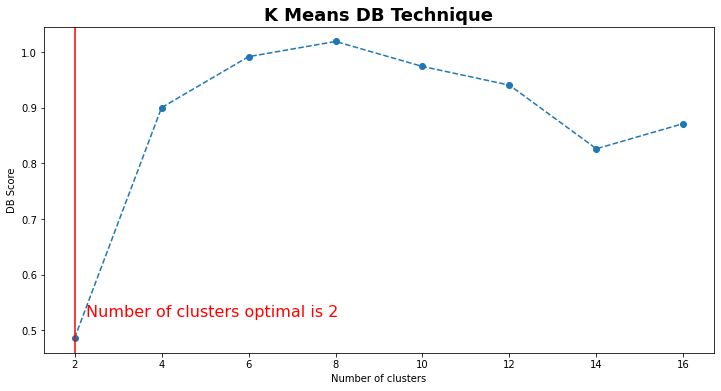

In [12]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),kmeans_index_davies,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('DB Score')
plt.title('K Means DB Technique',fontweight='bold',fontsize=18)
plt.axvline(kmeans_ng_davies,color='r',linestyle='-')
plt.text(2.25,0.5250,"Number of clusters optimal is {}".format(kmeans_ng_davies),color = 'red',fontsize = 16)

Text(2.25, 17.25, 'Number of clusters optimal is 2')

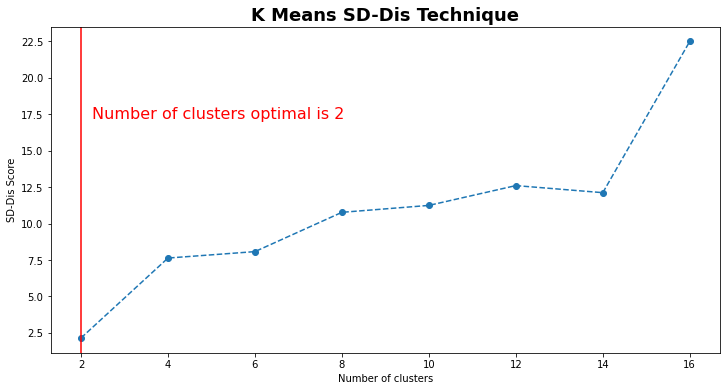

In [13]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),kmeans_index_sddis,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('SD-Dis Score')
plt.title('K Means SD-Dis Technique',fontweight='bold',fontsize=18)
plt.axvline(kmeans_ng_sddis,color='r',linestyle='-')
plt.text(2.25,17.250,"Number of clusters optimal is {}".format(kmeans_ng_sddis),color = 'red',fontsize = 16)

# K Medoids calculation

In [14]:
kmedoids_ng, kmedoids_index = get_n_groups_elbow_technique(scaled_iris, KMedoids, m, n, step)
kmedoids_ng_dunn, kmedoids_index_dunn = get_n_groups_max_diff(scaled_iris, KMedoids, 'dunn', m, n, step)
kmedoids_ng_sil, kmedoids_index_sil = get_n_groups_max_diff(scaled_iris, KMedoids, 'sil', m, n, step)
kmedoids_ng_davies, kmedoids_index_davies = get_n_groups_min_diff(scaled_iris, KMedoids, 'davies', m, n, step)
kmedoids_ng_sddis, kmedoids_index_sddis = get_n_groups_min_diff(scaled_iris, KMedoids, 'sddis', m, n, step)

## Plotting K Medoids result

Text(5.25, 8.25, 'Number of clusters optimal is 8')

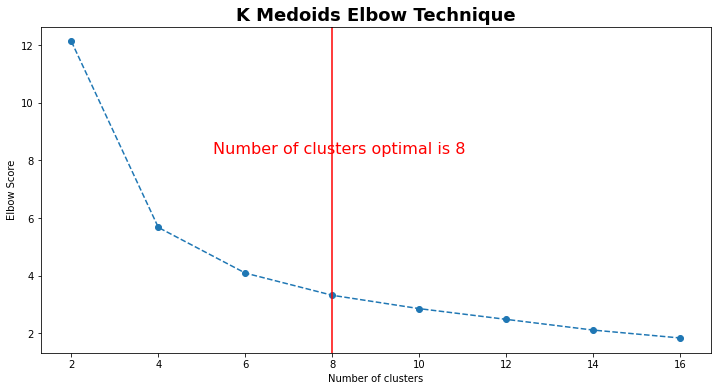

In [15]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),kmedoids_index,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Elbow Score')
plt.title('K Medoids Elbow Technique',fontweight='bold',fontsize=18)
plt.axvline(kmedoids_ng,color='r',linestyle='-')
plt.text(5.25,8.250,"Number of clusters optimal is {}".format(kmedoids_ng), color = 'red',fontsize = 16)

Text(2.25, 0.3525, 'Number of clusters optimal is 2')

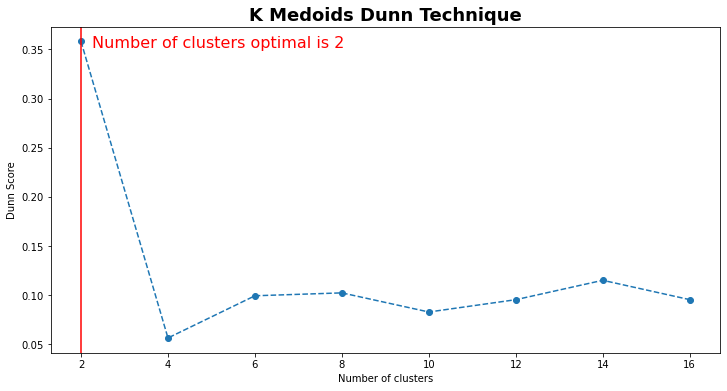

In [16]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),kmedoids_index_dunn,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Dunn Score')
plt.title('K Medoids Dunn Technique',fontweight='bold',fontsize = 18)
plt.axvline(kmedoids_ng_dunn, color = 'r', linestyle = '-')
plt.text(2.25,0.35250,"Number of clusters optimal is {}".format(kmedoids_ng_dunn),color = 'red',fontsize = 16)

Text(2.25, 0.625, 'Number of clusters optimal is 2')

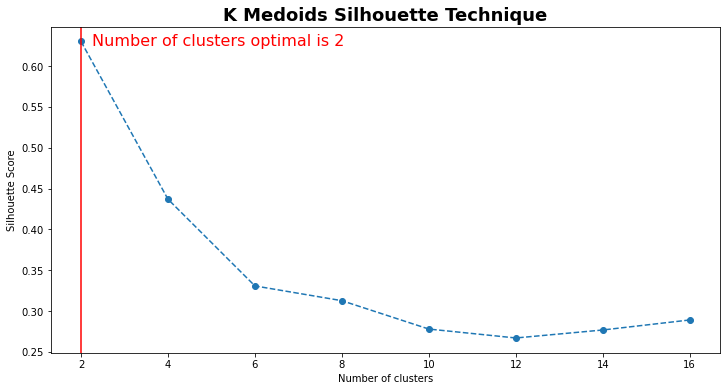

In [17]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),kmedoids_index_sil,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('K Medoids Silhouette Technique',fontweight='bold',fontsize=18)
plt.axvline(kmedoids_ng_sil,color='r',linestyle='-')
plt.text(2.25,0.6250,"Number of clusters optimal is {}".format(kmedoids_ng_sil),color = 'red',fontsize = 16)

Text(2.25, 0.525, 'Number of clusters optimal is 2')

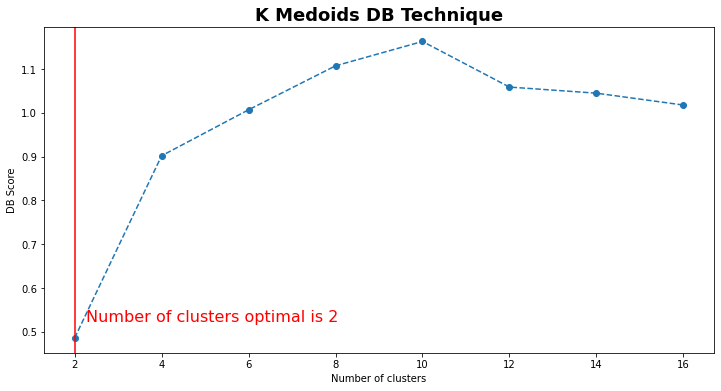

In [18]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),kmedoids_index_davies,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('DB Score')
plt.title('K Medoids DB Technique',fontweight='bold',fontsize=18)
plt.axvline(kmedoids_ng_davies,color='r',linestyle='-')
plt.text(2.25,0.5250,"Number of clusters optimal is {}".format(kmedoids_ng_davies),color = 'red',fontsize = 16)

Text(2.25, 17.25, 'Number of clusters optimal is 2')

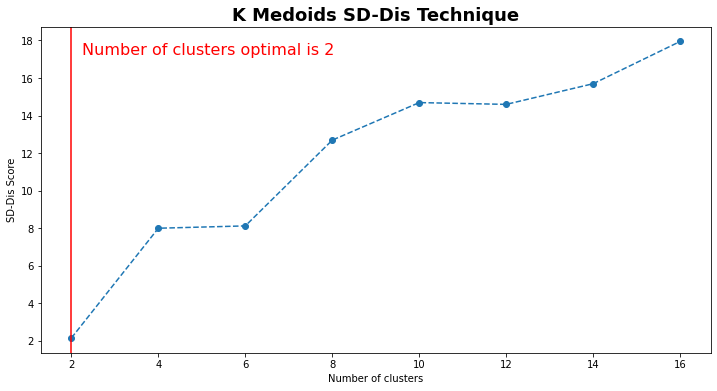

In [19]:
plt.figure(figsize=(12,6))
plt.plot(range(2, 17, 2),kmedoids_index_sddis,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('SD-Dis Score')
plt.title('K Medoids SD-Dis Technique',fontweight='bold',fontsize=18)
plt.axvline(kmedoids_ng_sddis,color='r',linestyle='-')
plt.text(2.25,17.250,"Number of clusters optimal is {}".format(kmedoids_ng_sddis),color = 'red',fontsize = 16)

# Fuzzy C Means calculation

In [20]:
fuzzy_ng, fuzzy_index = get_n_groups_elbow_technique(scaled_iris, FCM, m, n, step)
fuzzy_ng_dunn, fuzzy_index_dunn = get_n_groups_max_diff(scaled_iris, FCM, 'dunn', m, n, step)
fuzzy_ng_sil, fuzzy_index_sil = get_n_groups_max_diff(scaled_iris, FCM, 'sil', m, n, step)
fuzzy_ng_davies, fuzzy_index_davies = get_n_groups_min_diff(scaled_iris, FCM, 'davies', m, n, step)
fuzzy_ng_sddis, fuzzy_index_sddis = get_n_groups_min_diff(scaled_iris, FCM, 'sddis', m, n, step)

## Plotting Fuzzy C Means result

Text(5.25, 8.25, 'Number of clusters optimal is 8')

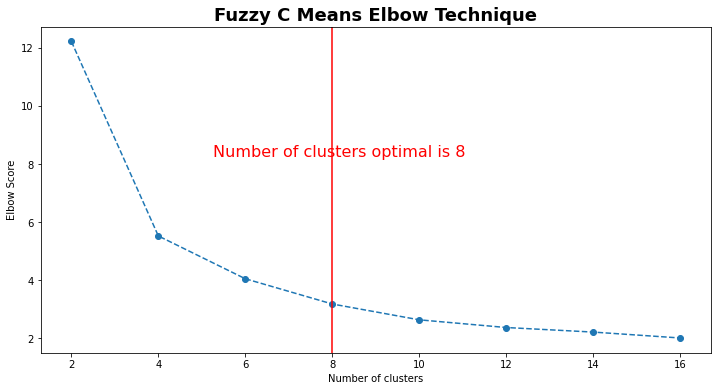

In [21]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),fuzzy_index,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Elbow Score')
plt.title('Fuzzy C Means Elbow Technique',fontweight='bold',fontsize=18)
plt.axvline(fuzzy_ng,color='r',linestyle='-')
plt.text(5.25,8.250,"Number of clusters optimal is {}".format(fuzzy_ng), color = 'red',fontsize = 16)

Text(8.25, 0.0525, 'Number of clusters optimal is 8')

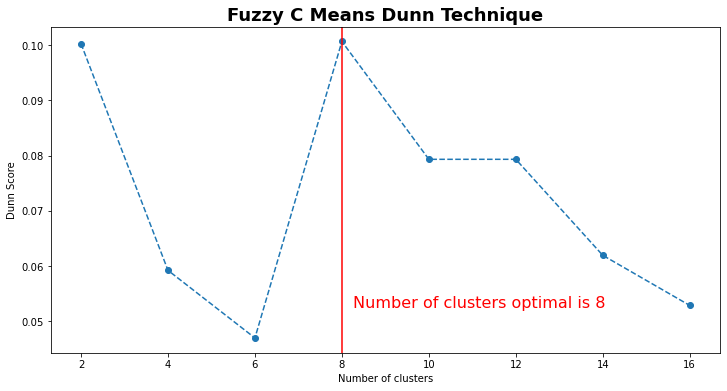

In [23]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),fuzzy_index_dunn,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Dunn Score')
plt.title('Fuzzy C Means Dunn Technique',fontweight='bold',fontsize = 18)
plt.axvline(fuzzy_ng_dunn, color = 'r', linestyle = '-')
plt.text(8.25,0.05250,"Number of clusters optimal is {}".format(fuzzy_ng_dunn),color = 'red',fontsize = 16)

Text(2.25, 0.2525, 'Number of clusters optimal is 2')

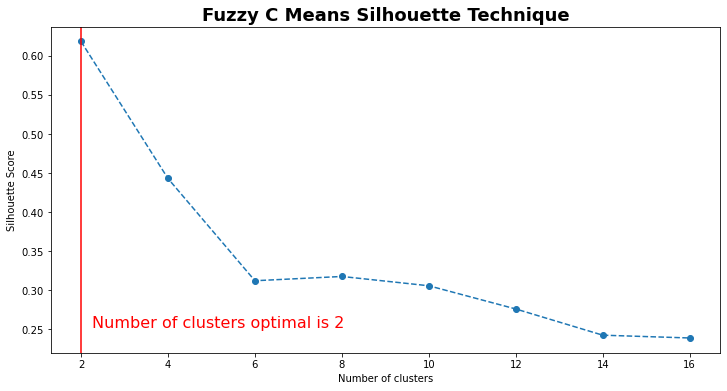

In [24]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),fuzzy_index_sil,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Fuzzy C Means Silhouette Technique',fontweight='bold',fontsize=18)
plt.axvline(fuzzy_ng_sil, color='r', linestyle='-')
plt.text(2.25,0.25250,"Number of clusters optimal is {}".format(fuzzy_ng_sil),color = 'red',fontsize = 16)

Text(2.25, 0.525, 'Number of clusters optimal is 2')

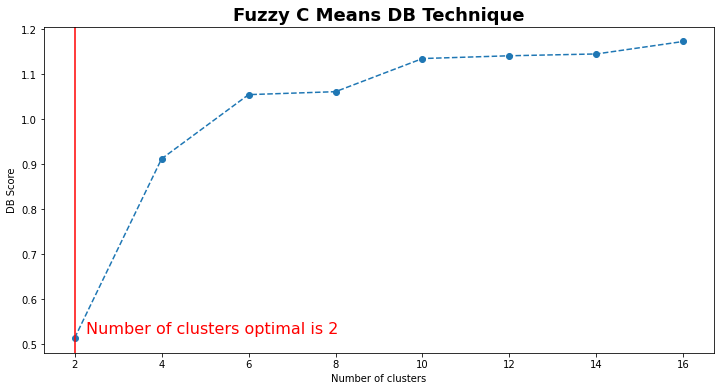

In [25]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),fuzzy_index_davies,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('DB Score')
plt.title('Fuzzy C Means DB Technique',fontweight='bold',fontsize=18)
plt.axvline(fuzzy_ng_davies,color='r',linestyle='-')
plt.text(2.25,0.5250,"Number of clusters optimal is {}".format(fuzzy_ng_davies),color = 'red',fontsize = 16)

Text(2.25, 17.25, 'Number of clusters optimal is 2')

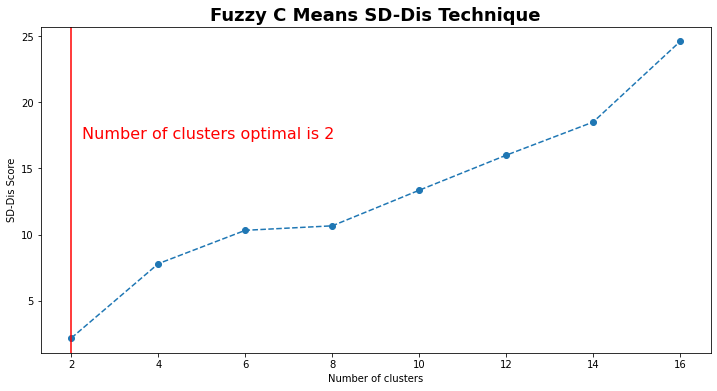

In [26]:
plt.figure(figsize=(12,6))
plt.plot(range(2,17,2),fuzzy_index_sddis,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('SD-Dis Score')
plt.title('Fuzzy C Means SD-Dis Technique',fontweight='bold',fontsize=18)
plt.axvline(fuzzy_ng_sddis,color='r',linestyle='-')
plt.text(2.25,17.250,"Number of clusters optimal is {}".format(fuzzy_ng_sddis),color = 'red',fontsize = 16)